# Data Loading and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [98]:
df['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [99]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop customer ID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Convert categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

 ## Exploratory Data Analysis (EDA)

In [ ]:
# Churn distribution using plotly pie smaller figsize
fig = go.Figure(go.Pie(labels=['No Churn', 'Churn'], values=[950, 50], hole=0.4))
fig.update_layout(title_text='Churn Distribution', width=600, height=600)
fig.show()



In [32]:
# Customers with monthly contract are more likely to churn
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
colors = ['lightcoral', 'lightblue', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4, marker=dict(colors=colors))])
fig.update_layout(title_text='Payment Method Distribution', width=600, height=600)
fig.show()


fig = px.colors.qualitative.swatches()
fig = px.histogram(df, x='Churn', barmode='group', color='PaymentMethod', color_discrete_sequence=px.colors.qualitative.T10) 
fig.update_layout(title_text='Payment Method Distribution w.r.t Churn ', width=800, height=600)
fig.show()

In [31]:
# Dependent variable distribution
fig = px.histogram(df, x='Churn', color="Dependents", barmode='group', title='Churn Distribution w.r.t Dependents', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
# Churn distribution by gender
fig = px.histogram(df, x='Churn', color="gender", barmode='group', title='Churn Distribution w.r.t Gender')
fig.update_layout(width=800, height=600)
fig.show()

In [37]:
# Churn distribution by internet service
fig = px.histogram(df, x='Churn', color="InternetService", barmode='group', title='Churn Distribution w.r.t Internet Service', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(width=800, height=600)
fig.show()

In [30]:
# Churn distribution by contract type
fig = px.histogram(df, x='Churn', color="Contract", barmode='group', title='Churn Distribution w.r.t Contract Type')
fig.update_layout(width=800, height=600)
fig.show()

In [27]:
# Churn distribution by payment method
fig = px.histogram(df, x='Churn', color="PaymentMethod", barmode='group', title='Churn Distribution w.r.t Payment Method', color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_layout(width=800, height=600)
fig.show()

In [24]:
# Churn distribution by online security
fig = px.histogram(df, x='Churn', color="OnlineSecurity", barmode='group', title='Churn Distribution w.r.t Online Security', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(width=800, height=600)
fig.show()


In [40]:
# churn distribution by tech support
fig = px.histogram(df, x='Churn', color="TechSupport", barmode='group', title='Churn Distribution w.r.t Tech Support', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(width=800, height=600)
fig.show()

In [45]:
# churn distribution by streaming tv
fig = px.histogram(df, x='Churn', color="StreamingTV", barmode='group', title='Churn Distribution w.r.t Streaming TV', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=800, height=600)
fig.show()

In [46]:
# churn distribution by Paperless billing
fig = px.histogram(df, x='Churn', color="PaperlessBilling", barmode='group', title='Churn Distribution w.r.t Paperless Billing', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(width=800, height=600)
fig.show()

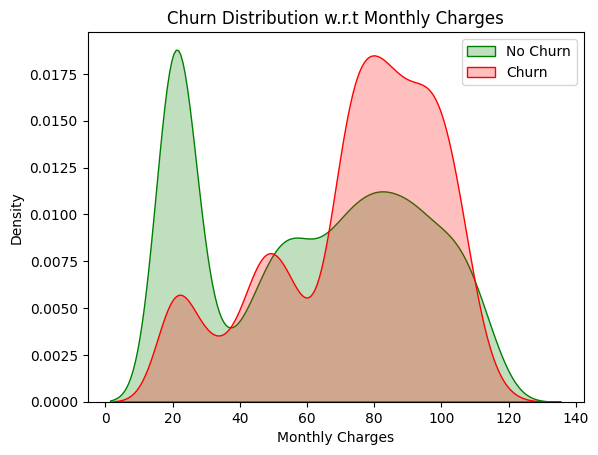

In [51]:
# Churn distribution by monthly charges
ax = sns.kdeplot(df.MonthlyCharges[df['Churn'] == 0], color='green', label='No Churn', shade=True)
ax = sns.kdeplot(df.MonthlyCharges[df['Churn'] == 1], color='red', label='Churn', shade=True)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.set_title('Churn Distribution w.r.t Monthly Charges')
ax.legend()
plt.show()

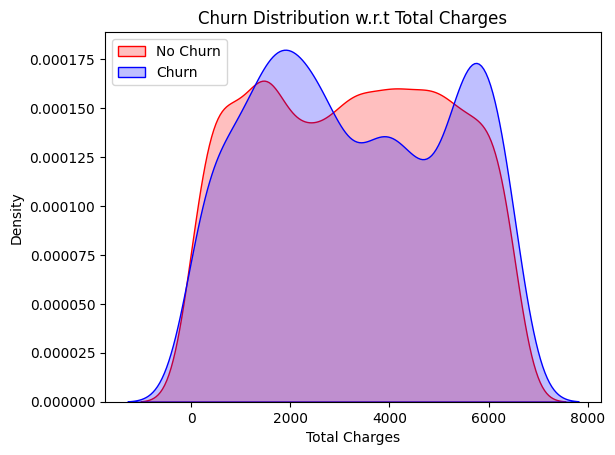

In [61]:
# Churn distribution by Total charges
ax = sns.kdeplot(df.TotalCharges[df['Churn'] == 0], color='red', label='No Churn', shade=True)
ax = sns.kdeplot(df.TotalCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.set_title('Churn Distribution w.r.t Total Charges')
ax.legend()
plt.show()

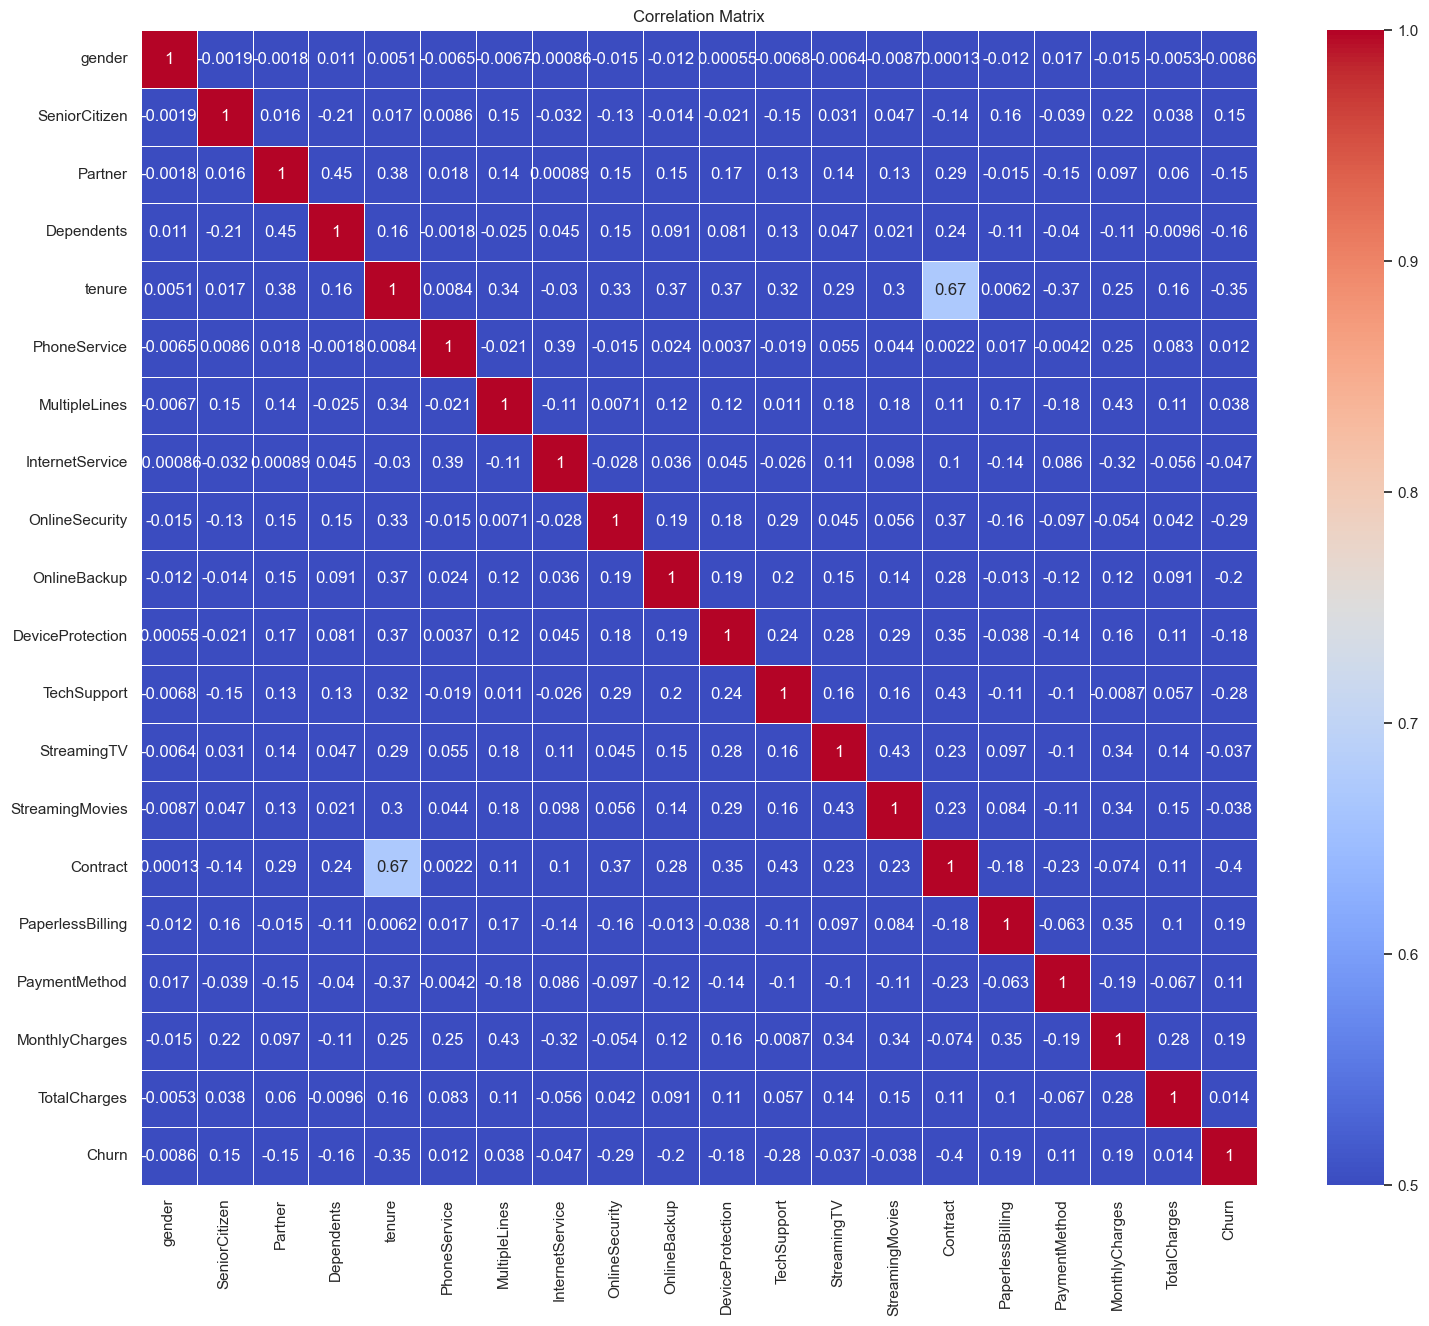

In [ ]:
# Correlation matrix
sns.set(style="whitegrid")
plt.figure(figsize=(18, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, linewidths=0.5, vmin=0.5, vmax=1)
plt.title('Correlation Matrix')
plt.show()

 ## Model Building


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[945  91]
 [190 183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy: 0.8005677785663591


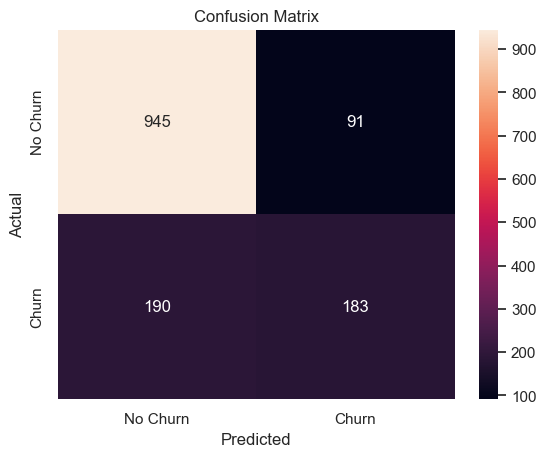

In [97]:
# confusion matrix graph
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 ## Feature Importance

In [91]:
# Get feature importances
importances = model.feature_importances_
feature_names = df.drop('Churn', axis=1).columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importance', color='Importance', color_continuous_scale='viridis', color_continuous_midpoint=0.5)
fig.update_layout(width=800, height=600)
fig.show()